## Logistics Regression

- Assumption
    - Generalized Linear Models
- Estimation (Loss and Optimization Technique)
- Hypothesis Testing


## 1. Basics

### Assumption

$y_i$ follows a Bernoulli($p_i$) distribution, where $$log(\frac{p_i}{1-p_i}) = \beta^Tx_i$$.

#### Generalized Linear Models

The real logic is this: if we can model <span style=color:red> every paramter of the distribution of $y_i$ as some parametric function of $x_i$, </span> we can estimate the parameters through MLE on any sample of $(X, Y)$.

For distributions in the exponential family, where the pdf takes the form $f_Y(y|\theta, \phi, w) = c(y, \phi, w) e^{\frac{y\theta - b(\theta)}{\phi}w}$, we have two sets of parameters that can fully characterize them. One is the familiar set, such as $(n,p)$ for binomial, $\lambda$ for Poisson, or $(\mu, \sigma^2)$ for normal; the other set is the $(\theta, \phi, b)$ that comes from the unified expression of an exponential family function. 

In any GLM model, we assume $\theta$ is a linear combination of $x$, and try to put the familiar set of paramters in terms of $\theta$, so that all paramters can be eventually stated in terms of $x$. This link between familiar parameters and exponential family paramters can be found through properties of the above pdf. Specifically <span style=color:red> the below system of equations holds</span>:

$$\mu_i = b'(\theta_i)$$ 
and 
$$Var(y_i|x_i) = \frac{\phi}{w_i}v(\mu)$$

where the <span style=color:red>__LHS are supposed to be expressed in term of the familiar parameters, and RHS in terms of the exponential family distribution parameters__</span>. $b'$ is called the link function. It maps $\theta$ to $\mu$.

Why are two equations enough? All distributions in the exponential family have no more than 2 paramters. They include _Binomial, Poisson, Negative Binomial, Gamma, Inverse Gamma, Gaussian_.

### Estimation

#### Loss Function from Likelihood

Note the likelihood of one Bernoulli sample is conviniently expressed as $$p_i^{y_i}(1 - p_i)^{1 - y_i}$$

Then the negative log likelihood on the sample is nothing but $$J(\beta) = -\Sigma_{i}[y_iln(p_i) + (1 - y_i)ln(1 - p_i)]$$ 

This is also called "cross-entropy loss". The optimal $\beta$ is our estimate.

#### Optimization Technique

Optimized through Newton-Ralphson's Method. It converges in the order of 2, meaning the error shrinks by about 2 significant digits with each iteration.

When used to find root, Newton's method updates through $$x \leftarrow x - \frac{f(x)}{f'(x)}$$

When used to optimize the loss, we're doing the same thing as finding the root of the Jacobian: $$\hat{\beta} \leftarrow \hat{\beta} - (\nabla^2 J)^{-1} \nabla J $$

This method is sometimes call __Iterative Re-Weighted Least Square__.

### Hypothesis Testing

We test $H_0$ against $H_1$ through likelihood ratio test. Note originally 
$$\Lambda = \frac{L(\hat{\beta}_{H_0}|H_0)}{L(\hat{\beta}_{H_1}|H_1)}$$

After applying twice negative log likelihood, we have 
$$-2ln(\Lambda) = 2(J(\hat{\beta}_{H_0}|H_0) - J(\hat{\beta}_{H_1}|H_1))$$.

Almost miracously, this statistic follows a $\chi^2$ with dof equaling difference in number of paramters in two hypothesis. 

#### Reading off outputs from R

In R anova() output, Deviance is the LRT statistic for the bigger model against the incrementally smaller model.

Res.Div is the $-2logL$ for the model, or the cross-entropy loss.

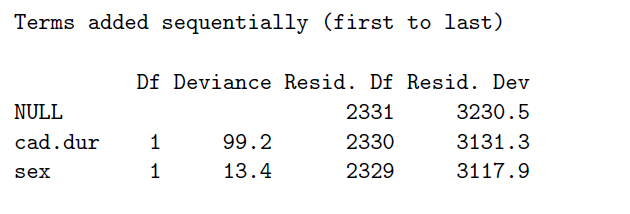

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 2. Intermediate

### 2.1 Does the assumed probability really admit a frequency intepretation?

In [2]:
?np.random.randn

In [17]:
## Simulate a dataset with 
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

x1 = np.random.normal(0,1, size=1000)
x2 = np.random.normal(0,10,size=1000)
x3 = np.random.normal(5,10,size=1000)

b0 = 10
b1 = 5
b2 = 2
b3 = 1

logit_p = (b0 + b1*x1 + b2*x2 + b3*x3)
p = np.array(list(map(sigmoid, logit_p)))
y = p > 0.5

y

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,